## Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

**Objective**: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

---

### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

---

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

---

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

---

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 

**Bonus**: 

- Do the same analysis without taking out the outliers. What are your insights?



# Import

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import statsmodels.api as sm



%matplotlib inline

# Load

In [29]:
!dir .

 Datentr„ger in Laufwerk C: ist Windows
 Volumeseriennummer: 20BD-6958

 Verzeichnis von C:\Users\andre\Documents\IRONHACK\UNIT_5\Labs\lab-eda-bivariate

19.03.2024  22:23    <DIR>          .
19.03.2024  09:30    <DIR>          ..
19.03.2024  09:38                43 .gitattributes
19.03.2024  09:35    <DIR>          .ipynb_checkpoints
19.03.2024  09:36    <DIR>          data
19.03.2024  09:30             3.969 lab_eda_bivariate.md
19.03.2024  22:23           136.813 lab_eda_bivariate_solution.ipynb
               3 Datei(en),        140.825 Bytes
               4 Verzeichnis(se), 682.591.199.232 Bytes frei


In [30]:
df = pd.read_csv("./data/raw/amz_uk_price_prediction_dataset.csv")

# Overview

In [31]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [32]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [33]:
# Retrieving the number of rows and columns in the dataframe
df.shape

(2443651, 9)

In [34]:
# Displaying the data typesme
df.dtypes # Pandas Series

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [35]:
df.info() # Pandas text

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


# Data Cleaning

### Checking for Missing Data

In [36]:
# Checking for missing data
df.isnull().sum()

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

# Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*




In [37]:
# Generating a crosstab for 'category' and 'isBestSeller'

crosstab_result = pd.crosstab(df['category'], df['isBestSeller']).sort_values(True, ascending=False)

crosstab_result

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
...,...,...
Downhill Ski Boots,1284,0
Digital Frames,774,0
Motorbike Chassis,107,0


In [38]:
# Generating a crosstab for 'category' and 'isBestSeller'

crosstab_result = pd.crosstab(df['category'], df['isBestSeller'], margins=True).sort_values(True, ascending=False)

crosstab_result

isBestSeller,False,True,All
category,,,
All,2435671,7980,2443651
Grocery,9008,556,9564
Health & Personal Care,9017,552,9569
Baby,14709,341,15050
Sports & Outdoors,835935,330,836265
...,...,...,...
Graphics Cards,249,0,249
Monitors,8565,0,8565
Motherboards,259,0,259


In [39]:
cross_tab_prop = crosstab_result.copy()
cross_tab_prop['Proportion_True'] = (cross_tab_prop[1] / cross_tab_prop['All'])
cross_tab_prop['Proportion_False'] = (cross_tab_prop[0] / cross_tab_prop['All'])
cross_tab_prop_sorted = cross_tab_prop.sort_values('Proportion_True', ascending=False)
cross_tab_prop_sorted

isBestSeller,False,True,All,Proportion_True,Proportion_False
category,,,,,
Grocery,9008,556,9564,0.058135,0.941865
Smart Home Security & Lighting,98,6,104,0.057692,0.942308
Health & Personal Care,9017,552,9569,0.057686,0.942314
Mobile Phone Accessories,248,11,259,0.042471,0.957529
Power & Hand Tools,8353,306,8659,0.035339,0.964661
...,...,...,...,...,...
Boxes & Organisers,911,0,911,0.000000,1.000000
Barebone PCs,9478,0,9478,0.000000,1.000000
External Sound Cards,5650,0,5650,0.000000,1.000000


**Insights** from Cross Tab analysis and Proportion Table:

- Grocery, Smart Home Security & Lighting, Health & Personal Care, Health & Personal Care tend to have a higher proportion of "Best Selelrs"

2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.



In [40]:
# Chi-square test for 'category' and 'isBestSeller'
chi2_statistic, chi2_p_value, grades_of_freedom, o_table = chi2_contingency(crosstab_result[[0,1]])

chi2_statistic, chi2_p_value, grades_of_freedom

(36540.20270061387, 0.0, 296)

**Insights** fromStatistical Tests:

- chi2 p-value of 0.0 (technically not possible) indicates a strong evidence against the null hypothesis -> there seems to be a relationship between those two variables

In [41]:
# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result[:5], method="cramer")


0.04220984912080872

**Insights** from Cramér's V:

- The Cramers V value is close to zero indicating very wweak relationship between those two columns

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

<Axes: xlabel='category'>

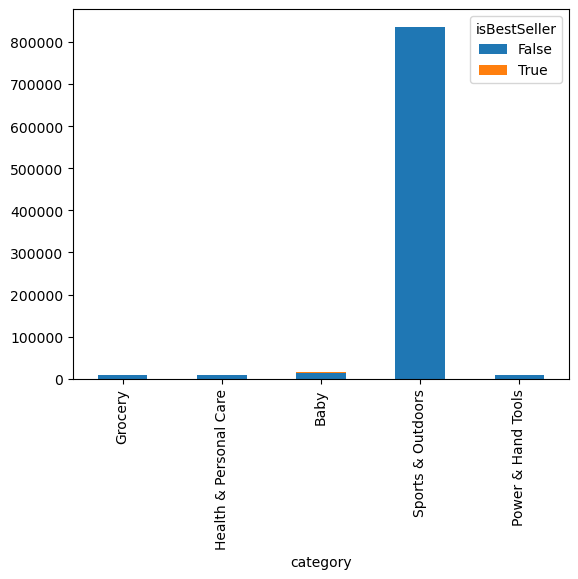

In [42]:
# Plotting a stacked bar chart for the 'crosstab_result' data
crosstab_result[[0,1]][1:6].plot(kind="bar", stacked=True)

<Axes: xlabel='category'>

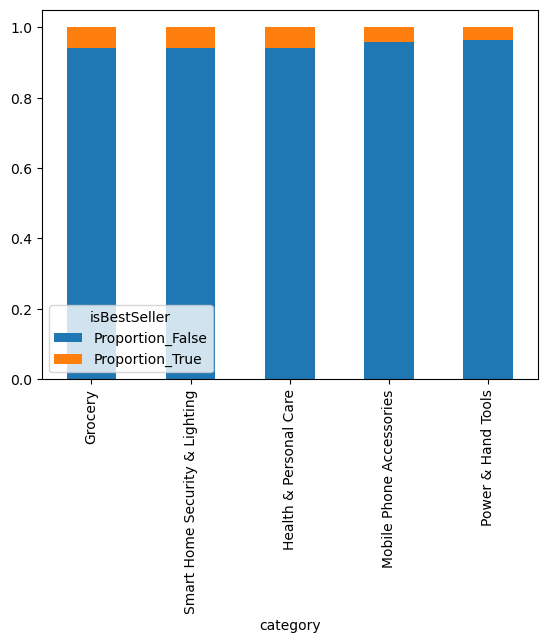

In [43]:
# Plotting a stacked bar chart for the 'crosstab_result' data - Proportion
cross_tab_prop_sorted[['Proportion_False','Proportion_True']][0:5].plot(kind="bar", stacked=True)

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.



0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*


In [44]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [45]:
# Rmv outliers for prices
df_out = df.copy()

data_series = df_out['price']  # replace 'ColumnName' with your specific column
outliers = tukeys_test_outliers(data_series)
#print(outliers)
df_out = df_out.iloc[~outliers.index,:]

In [46]:
df.shape, df_out.shape

((2443651, 9), (327688, 9))

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.



In [47]:
top_categories = df_out['category'].value_counts()[:20].index
top_categories

Index(['Sports & Outdoors', 'Bath & Body', 'Camera & Photo Accessories',
       'Handmade Clothing, Shoes & Accessories', 'Fragrances',
       'Luggage and travel gear', 'Binoculars, Telescopes & Optics',
       'Printers & Accessories', 'Portable Sound & Video Products',
       'Home Cinema, TV & Video', 'Smartwatches', 'Basketball Footwear',
       'Make-up', 'Motorbike Electrical & Batteries', 'Grocery',
       '3D Printing & Scanning', 'Surveillance Cameras',
       'Furniture & Lighting', 'Manicure & Pedicure Products',
       'Electronic Toys'],
      dtype='object', name='category')

In [48]:
df_topcat = df_out[df_out['category'].isin(top_categories)]
df_topcat.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2397667,2768047,B0979CQ5PG,PUGONGYING Popular Fit For 10 Pieces Artist D ...,0.0,0,20.47,False,0,3D Printing & Scanning
2397658,2768035,B0BZQ9SZ8F,APAAZO Premium CR10 Heater Block MK8 Silicone ...,0.0,0,11.40,False,0,3D Printing & Scanning
2397657,2768030,B0C4TZSWXF,APAAZO All Metal Bi-Metal Heatbreak Compatible...,0.0,0,10.93,False,0,3D Printing & Scanning
2397656,2767992,B09FF1T63C,PUGONGYING Popular 10 Pcs/lot Brass Nozzles Ex...,0.0,0,23.23,False,0,3D Printing & Scanning


C:\Users\andre\AppData\Local\Temp\ipykernel_26160\713860563.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_topcat, y='category', x='price', palette="coolwarm")


<Axes: xlabel='price', ylabel='category'>

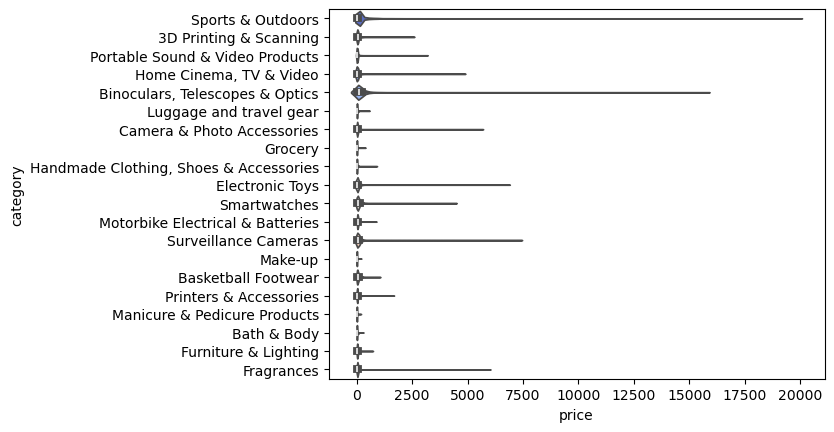

In [49]:
# Plotting a violin plot to visualize the distribution of 'SalePrice' for each 'MSZoning' category, using the "coolwarm" color palette
sns.violinplot(data=df_topcat, y='category', x='price', palette="coolwarm")

**Which product category tends to have the highest median price?**

In [50]:
category_median_price = df_out.groupby('category')['price'].median()
category_median_price.sort_values(ascending=False).index[0]

'Digital Cameras'

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.


In [51]:
top10_cat = df_out['category'].value_counts()[:10].index
top10_cat

Index(['Sports & Outdoors', 'Bath & Body', 'Camera & Photo Accessories',
       'Handmade Clothing, Shoes & Accessories', 'Fragrances',
       'Luggage and travel gear', 'Binoculars, Telescopes & Optics',
       'Printers & Accessories', 'Portable Sound & Video Products',
       'Home Cinema, TV & Video'],
      dtype='object', name='category')

In [52]:
df_top10cat = df_out[df_out['category'].isin(top10_cat)]
df_top10cat

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2397649,2767914,B0CCYYLJC8,G.I.G.A. DX Women's Quilted Hood/Functional Ve...,0.0,0,96.43,False,0,Sports & Outdoors
2397644,2767909,B0CGLPZFV1,Dynafit Women's Mezzalama PTC Alpha VST W Vest...,0.0,0,159.29,False,0,Sports & Outdoors
2397643,2767908,B0CGLQD1V7,Dynafit Women's Mezzalama PTC Alpha VST W Vest...,0.0,0,160.00,False,0,Sports & Outdoors
2397642,2767907,B0CGLQNP3T,Dynafit Women's Mezzalama PTC Alpha VST W Vest...,0.0,0,161.72,False,0,Sports & Outdoors
...,...,...,...,...,...,...,...,...,...
82179,89499,B01LCSZXUK,PROtastic Industrial Strength ORIGINAL Black T...,4.4,461,8.69,False,0,Sports & Outdoors
82178,89498,B09RKDRP22,GoPro Enduro Rechargeable Battery (HERO11 Blac...,4.6,1525,24.99,False,0,Sports & Outdoors
82177,89497,B07768BFPY,"LONDON FAB Waterproof Chest Mount, Harness, St...",4.4,2187,9.99,False,200,Sports & Outdoors
82176,89496,B00R4YCKIK,Amazon Basics Head Strap Camera Mount for GoPr...,4.5,10955,9.61,False,0,Sports & Outdoors


In [53]:
# Average Price per cat
avg_price_by_cat = df_top10cat.groupby('category')['price'].mean().sort_values(ascending=False)
avg_price_by_cat

category
Binoculars, Telescopes & Optics           255.746974
Sports & Outdoors                          98.561179
Home Cinema, TV & Video                    80.105075
Printers & Accessories                     50.135985
Camera & Photo Accessories                 49.997685
Fragrances                                 40.094859
Portable Sound & Video Products            36.659703
Luggage and travel gear                    24.739051
Handmade Clothing, Shoes & Accessories     20.474577
Bath & Body                                14.448091
Name: price, dtype: float64

C:\Users\andre\AppData\Local\Temp\ipykernel_26160\3064029007.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_price_by_cat.index, x=avg_price_by_cat.values, palette="coolwarm")


<Axes: ylabel='category'>

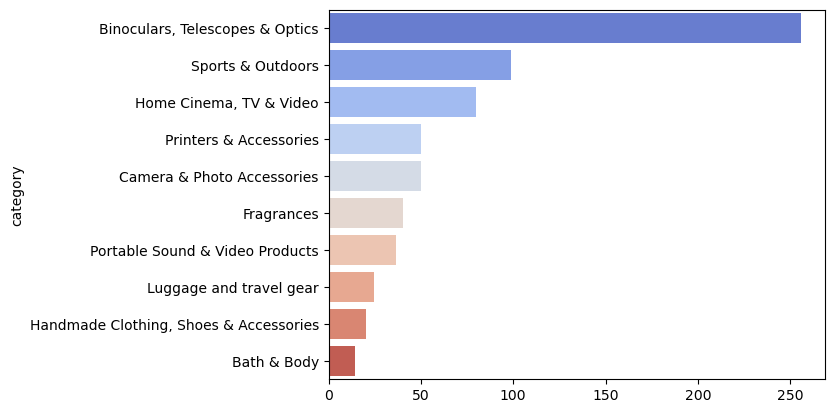

In [54]:
sns.barplot(y=avg_price_by_cat.index, x=avg_price_by_cat.values, palette="coolwarm")

**- Which product category commands the highest average price? Don't filter here by top categories.**

In [55]:
highest_avg_price = df_out.groupby('category')['price'].mean().sort_values(ascending=False)
highest_avg_price

category
Digital Cameras                  1524.000000
Professional Medical Supplies    1305.160000
Desktop PCs                       843.887138
Laptops                           758.762260
Home Office Furniture             700.880804
                                    ...     
USB Hubs                            8.990000
Signs & Plaques                     8.883333
Arts & Crafts                       7.906724
Bedding Accessories                 7.839167
Office Paper Products               7.099891
Name: price, Length: 283, dtype: float64

In [56]:
print(f"the product category with the highest average price is '{highest_avg_price.index[0]}'")

the product category with the highest average price is 'Digital Cameras'


3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

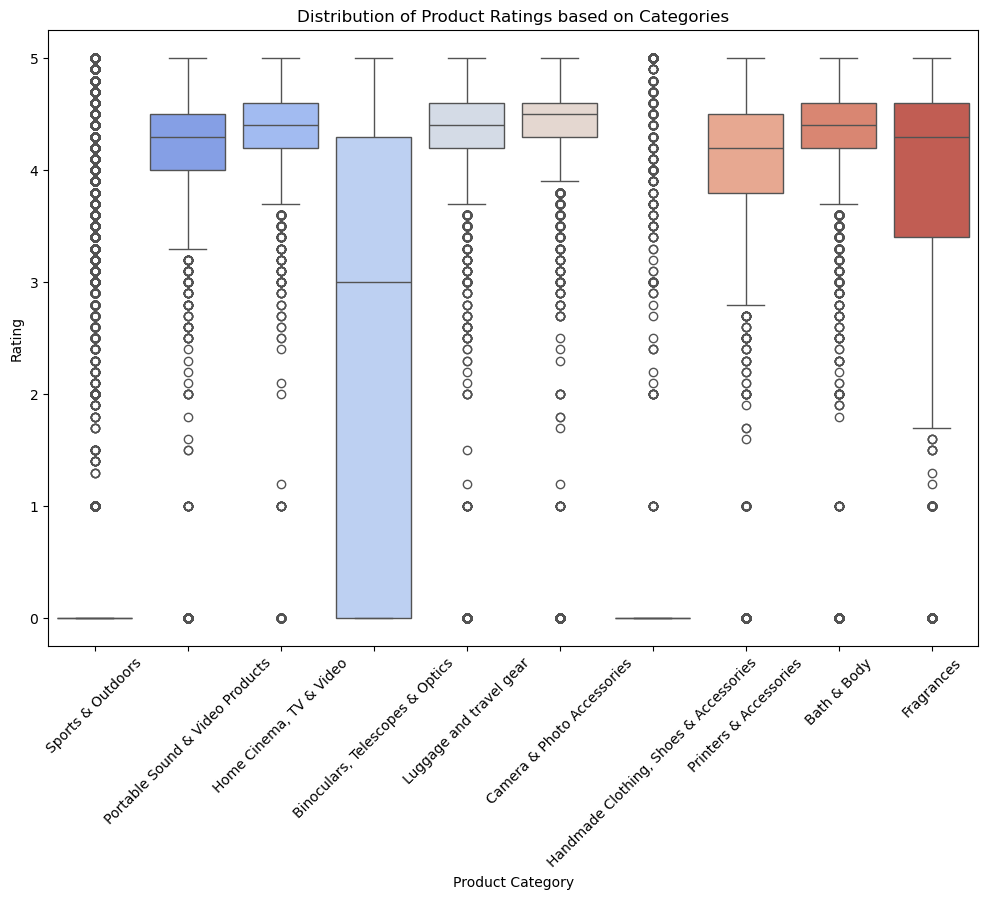

In [57]:
# Plotting a box plot to visualize the spread and outliers of 'category' for each 'price' category, using the "coolwarm" color palette
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top10cat, x='category', y='stars', hue="category" ,palette="coolwarm")
plt.title('Distribution of Product Ratings based on Categories')
plt.xticks(rotation=45)
plt.xlabel('Product Category')
plt.ylabel('Rating')

plt.show()

**Which category tends to receive the highest median rating from customers?**

In [58]:
highest_med_rate = df.groupby('category')['stars'].median().sort_values(ascending=False)
highest_med_rate

category
Computer Memory                4.7
Hobbies                        4.6
Beer, Wine & Spirits           4.6
Laptop Accessories             4.6
Kids' Play Figures             4.6
                              ... 
KVM Switches                   0.0
Karaoke Equipment              0.0
Lab & Scientific Products      0.0
Laptops                        0.0
eBook Readers & Accessories    0.0
Name: stars, Length: 296, dtype: float64

In [59]:
print(f"the product category with the highest median rate is '{highest_med_rate.index[0]}'")

the product category with the highest median rate is 'Computer Memory'


In [60]:
# If the df_out is used where the price outliers are filtered out then the category "USB Hubs" has the highes median rating -> indicating that the filtering of outliers in the price variables affects other variables
highest_med_rate[highest_med_rate.index=="USB Hubs"]

category
USB Hubs    4.4
Name: stars, dtype: float64

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.



1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	


In [61]:
# Calculating the Pearson correlation coefficient between 'price' and 'stars' columns
correlation = df['price'].corr(df['stars'])
correlation

-0.12490673262159059

In [62]:
# Calculating the Pearson correlation coefficient between 'price' and 'stars' columns - with outliers for price removed
correlation = df_out['price'].corr(df_out['stars'])
correlation

-0.09842525447416046

**Insights** from Correlation Coefficients:

- The Pearson correlation for the price and ratings variables indicate a weak (close to zero) negative relationship for the two variables

2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

<Axes: xlabel='price', ylabel='stars'>

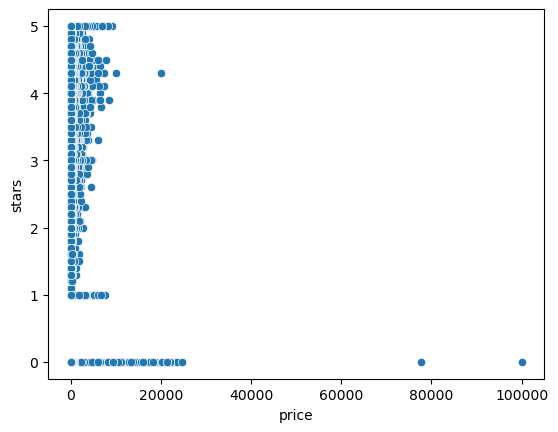

In [63]:
# Scatter plot to visualize the relationship between product rating and price
sns.scatterplot(data=df, x='price', y='stars')

<Axes: xlabel='price', ylabel='stars'>

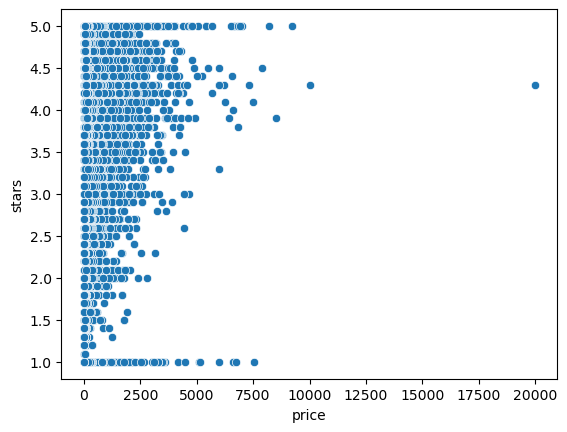

In [64]:
# Scatterplot without missing(=0) ratings
sns.scatterplot(data=df[(df["stars"]!=0)], x='price', y='stars')

<Axes: xlabel='price', ylabel='stars'>

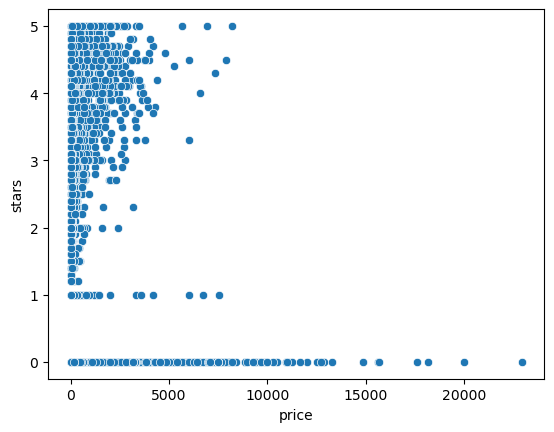

In [65]:
# Scatterplot without outliers
sns.scatterplot(data=df_out, x='price', y='stars')

<Axes: xlabel='price', ylabel='stars'>

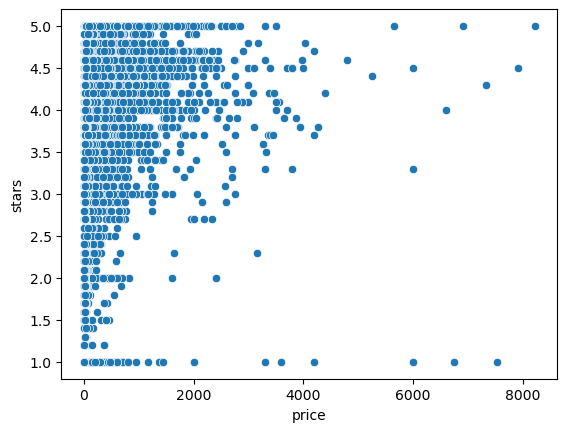

In [66]:
# Scatterplot without missing(=0) ratings
sns.scatterplot(data=df_out[(df_out["stars"]!=0)], x='price', y='stars')

**Insights** from Scatter Plot:

- There are a lot of products that were not rated (=0)
- There are many ratings that are just 1.0
- There is a tendency towards higher ratings

In [67]:
df_numerical = df.select_dtypes("number").drop(columns="uid") # drop uid column

In [68]:
# Select Numerical columns
df.shape, df_numerical.shape

((2443651, 9), (2443651, 4))

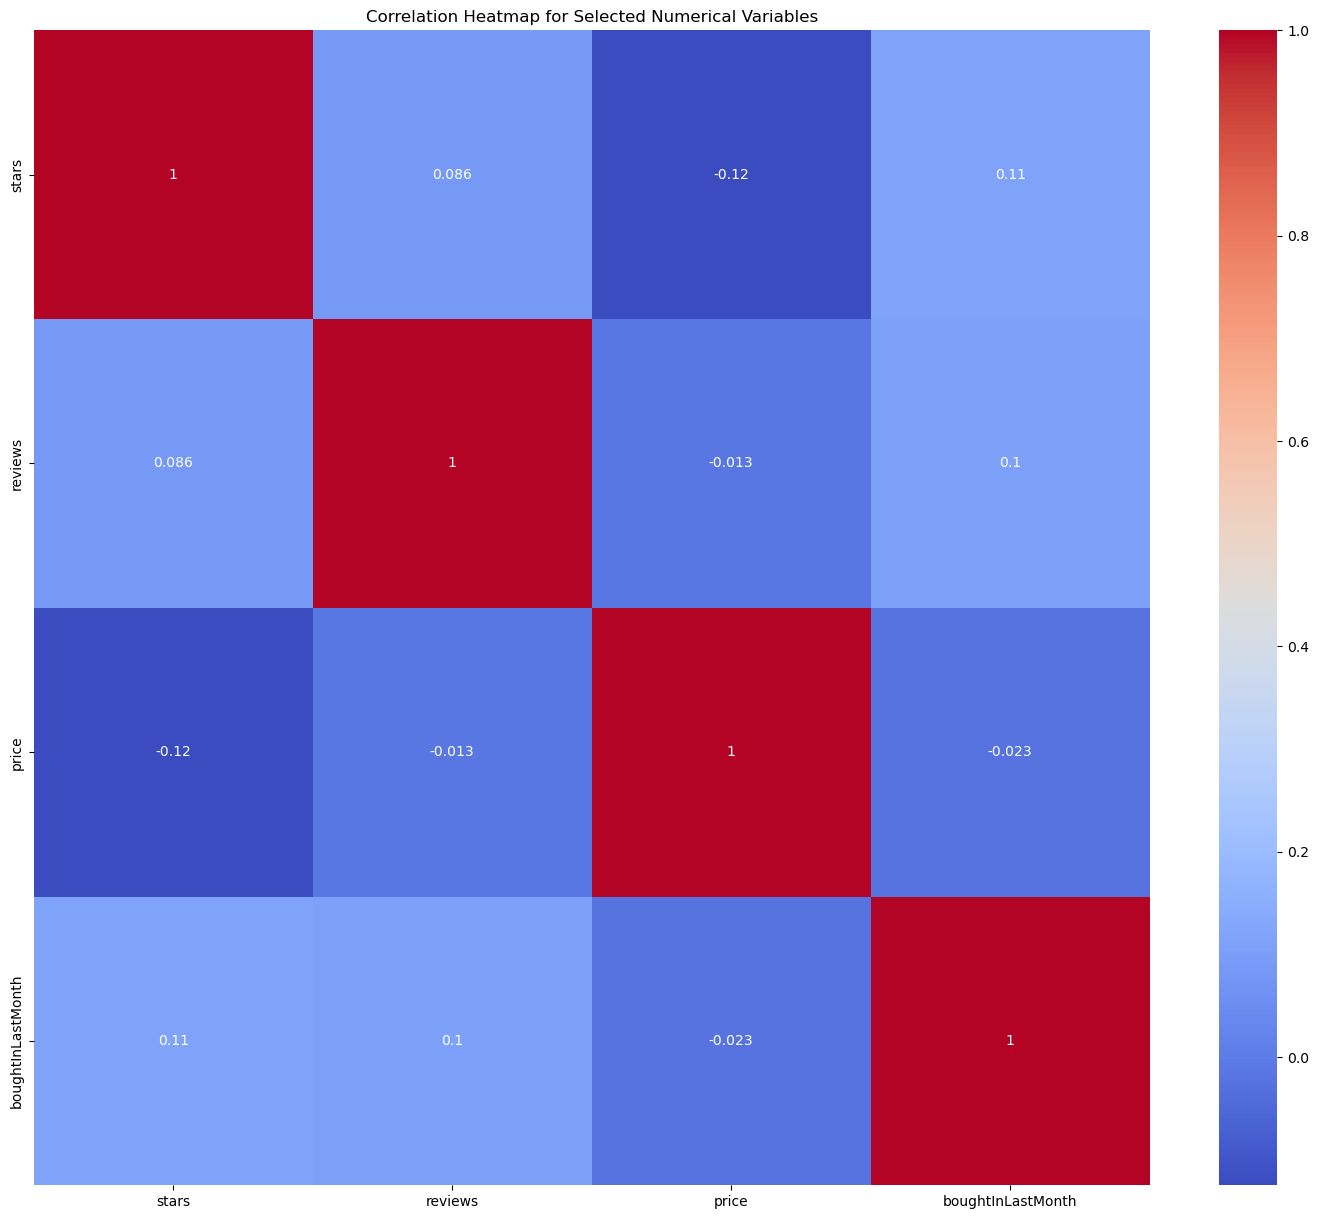

In [69]:
# correlation heatmap to visualize correlations between all numerical variables
correlation_matrix = df_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

**Insights** from Heat Map:

- There are is no visible correlation visible in the heatmap

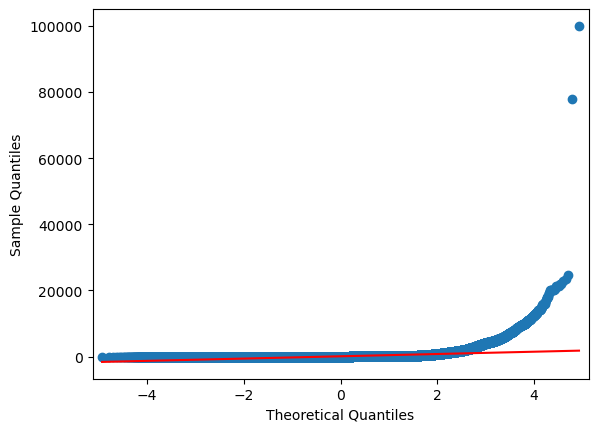

In [70]:
# Examine if product prices typically follow a normal distribution using a QQ plot. 

# Generating a Q-Q plot for 'price' to check if its distribution follows a normal distribution
sm.qqplot(df['price'], line='s');

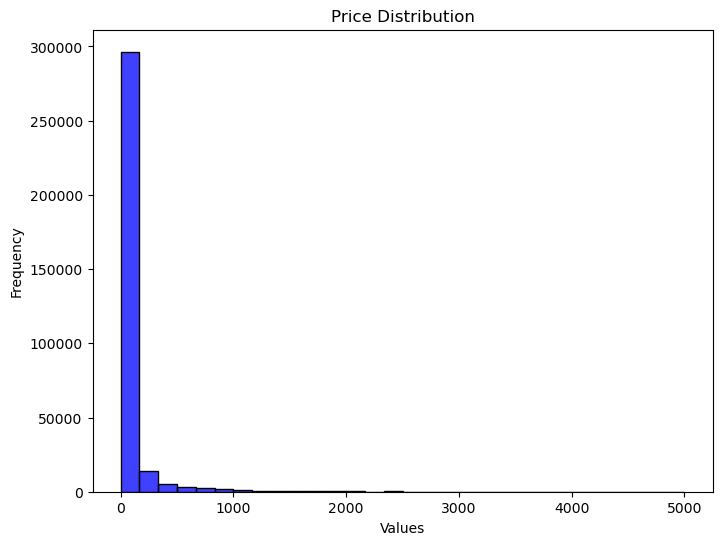

In [71]:
# Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_out['price'][df_out['price'] < 5000], kde=False, bins=30, color='blue')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

In [72]:
top_100 = df_out['price'].value_counts(ascending=False).head(100).index

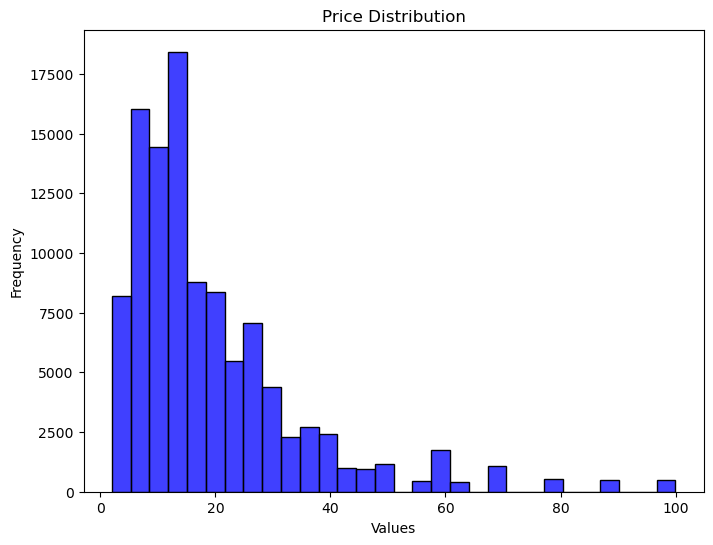

In [73]:
# Distribution Top 100
plt.figure(figsize=(8, 6))
sns.histplot(df_out['price'][df_out['price'].isin(top_100)], kde=False, bins=30, color='blue')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

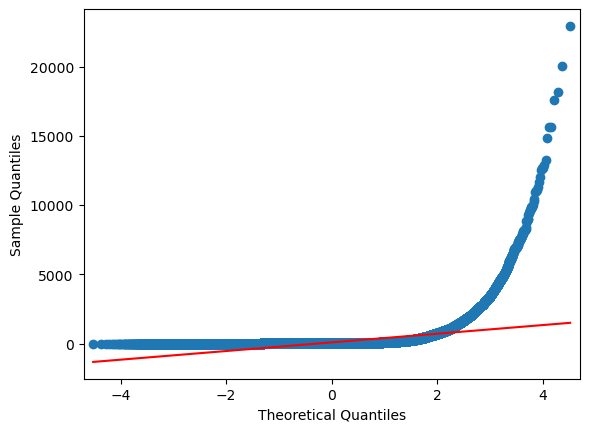

In [74]:
# Removing Outliers 

# Generating a Q-Q plot for 'price' to check if its distribution follows a normal distribution
sm.qqplot(df_out['price'], line='s');

**Insights** from Q-Q plot:

- The QQ plot indicates that the data follows a normal distribution for the majority of its range (not removing outliers) but show some deviation from the normal distribution in th extreme upper end